
# <span style="color:rgb(213,80,0)">Score test and fan plot 3.</span>

This file creates Figures A.30\-A.34 and Tables A.14\-A.16

## D3 Data loading

In [1]:
XX=load('D3.txt');
X=XX(:,1:end-1);
y=XX(:,end);
n=length(y);
prin=0;

## Create Figure A.30

D2 yXplot



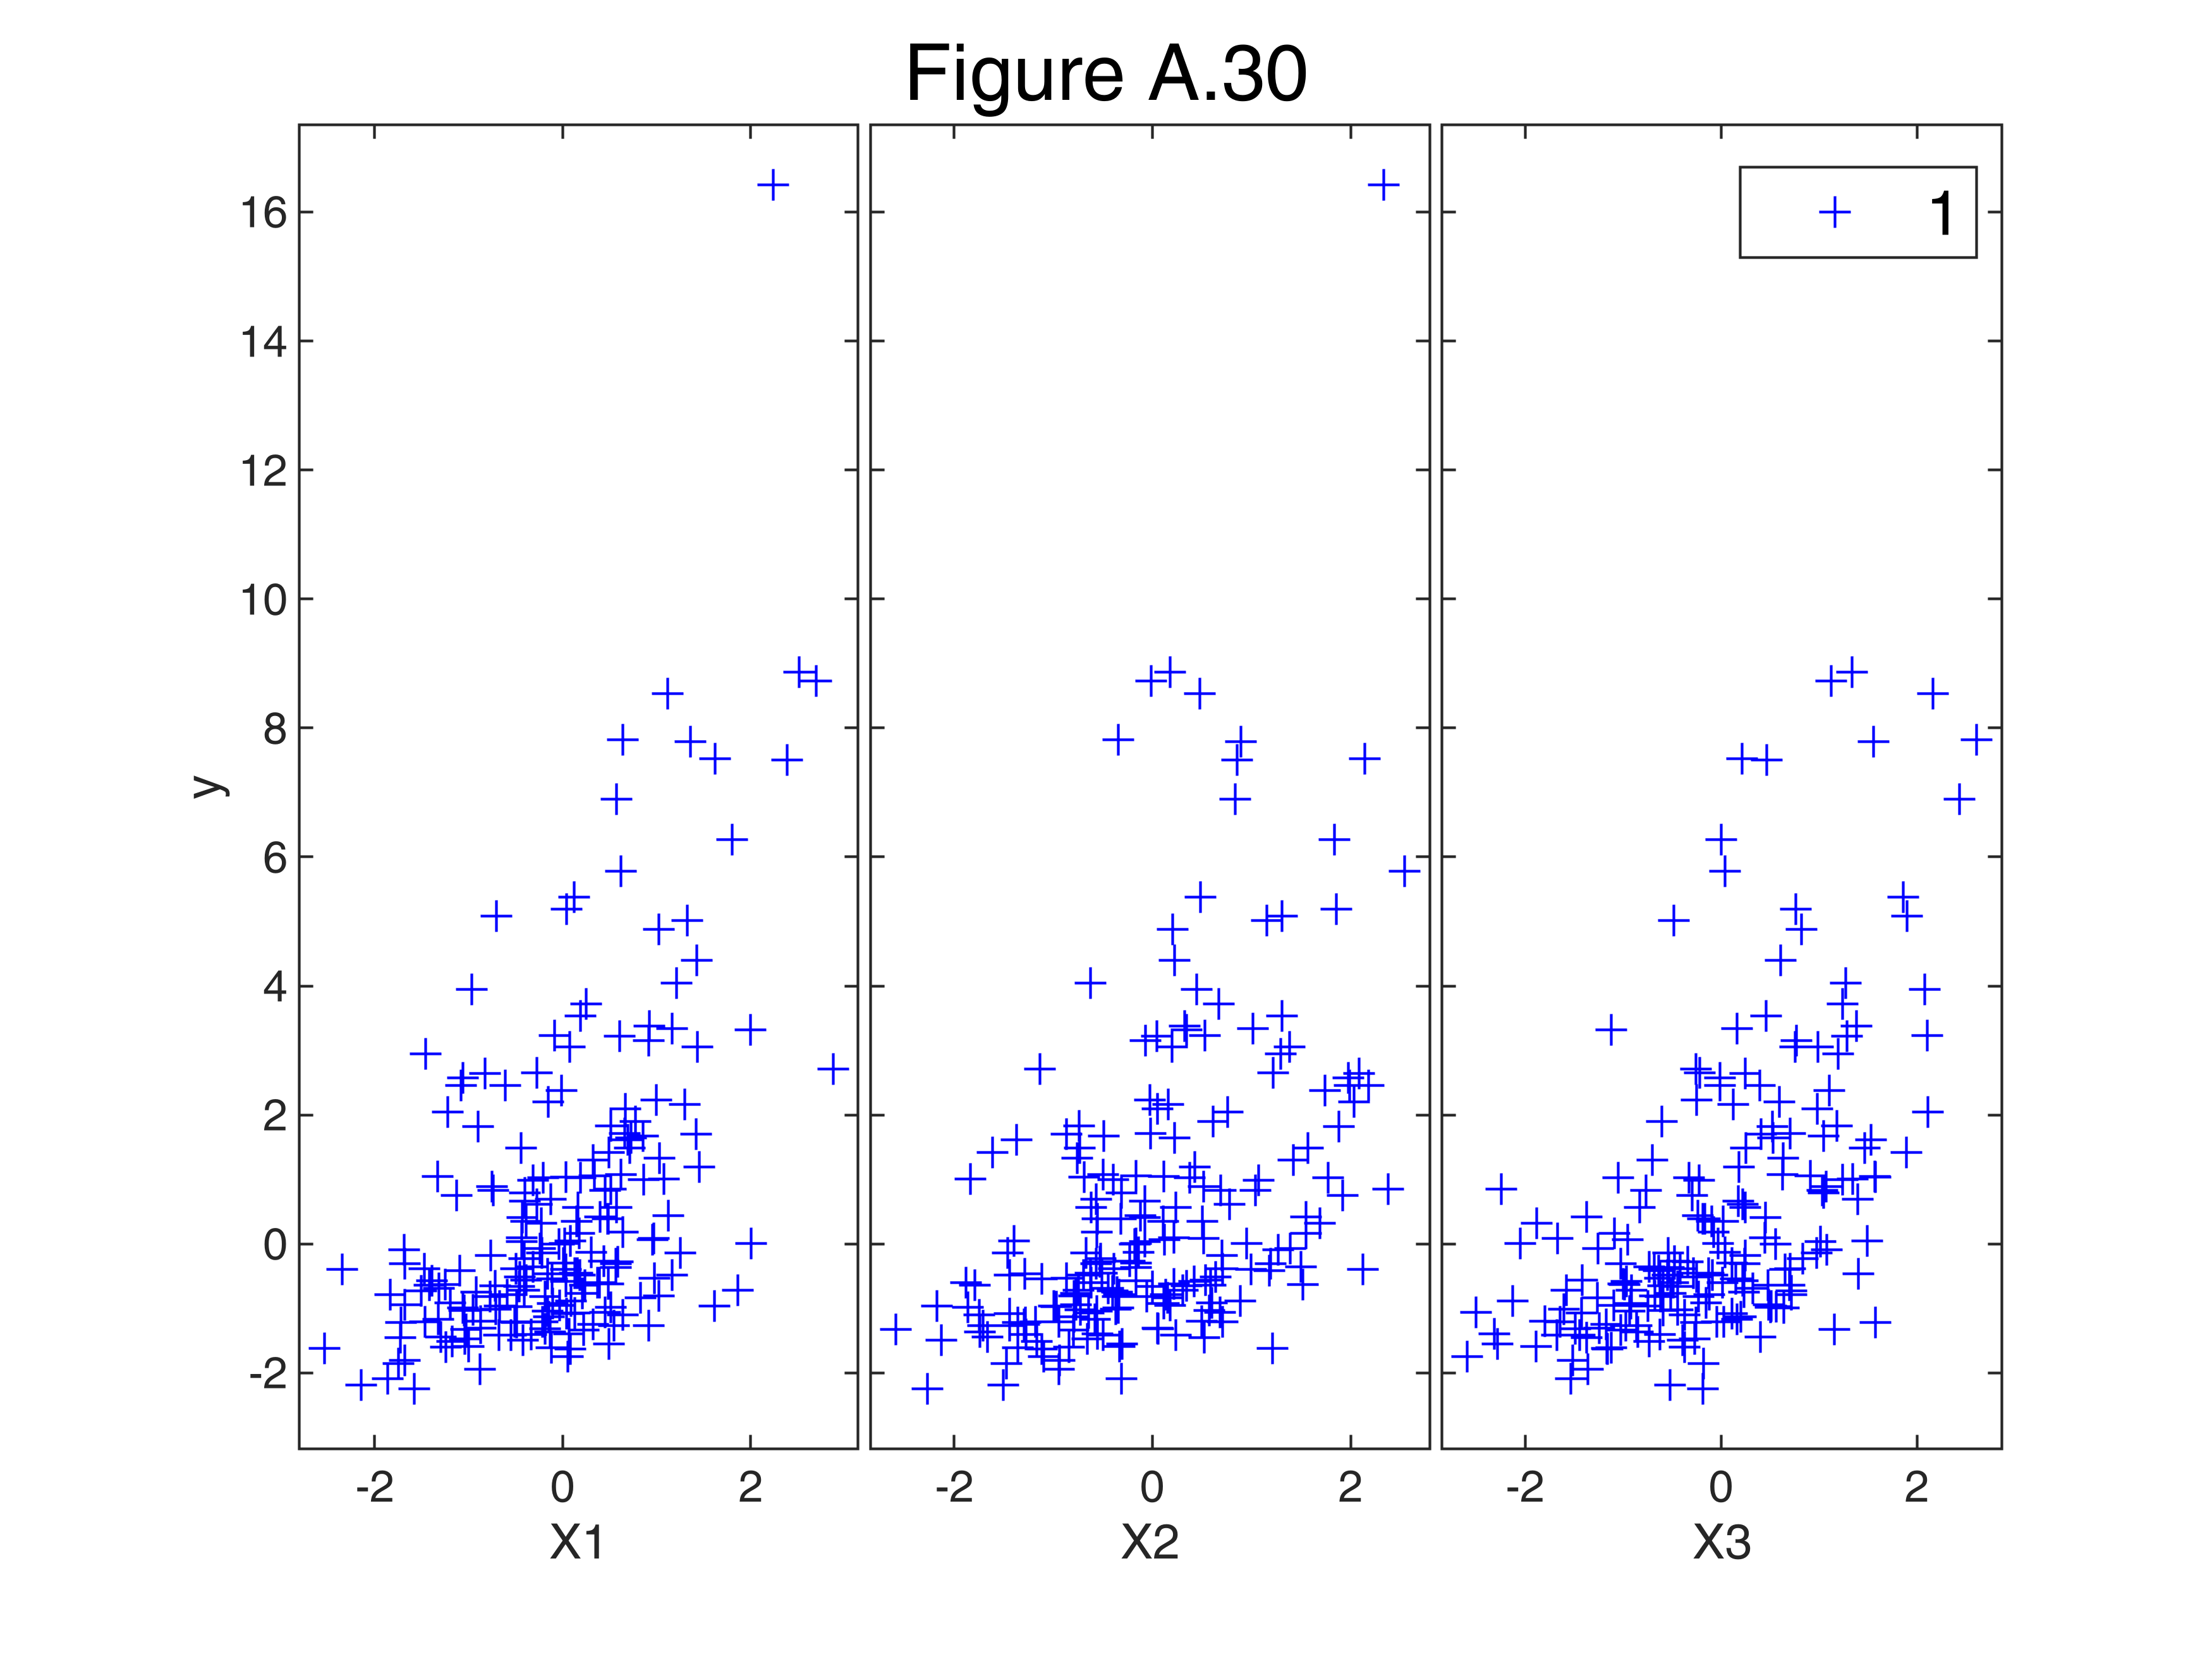

In [2]:
yXplot(y,X,'tag','pl_yini');

if prin==1
    legend off
    print -depsc D3yX.eps
else
    sgtitle('Figure A.30')
    set(gcf,"Name",'Figure A.30')
end

## Create Table A.14

In [3]:
disp('Table A.14: ANOVA in the original scale for y')

Table A.14: ANOVA in the original scale for y

In [4]:
outl=fitlm(X,y);
disp(outl)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                   Estimate       SE       tStat       pValue  
                   ________    ________    ______    __________
    (Intercept)     0.7694      0.08502    9.0496    1.4325e-16
    x1              1.3053     0.085587    15.251    3.8544e-35
    x2              1.1736     0.079887    14.691    1.9653e-33
    x3              1.2566       0.0809    15.533    5.3606e-36
Number of observations: 200, Error degrees of freedom: 196
Root Mean Squared Error: 1.2
R-squared: 0.782,  Adjusted R-Squared: 0.779
F-statistic vs. constant model: 234, p-value = 1.53e-64

## Create Table A.15

Score test


In [5]:
la=-1:0.25:1;
outS=ScoreYJ(y,X,'la',la);
varn=["lambda" "Score test"];
ScoreT=array2table([la' outS.Score],'VariableNames',varn);
disp("Table A.15")

Table A.15

In [6]:
disp(ScoreT)

    lambda    Score test
    ______    __________
       -1       46.466  
    -0.75       37.403  
     -0.5       28.162  
    -0.25       19.068  
        0       10.478  
     0.25       2.2486  
      0.5      -6.6266  
     0.75      -17.495  
        1      -30.473

## Create Figure A.31 (left panel)

D3 fanplot just one lambda



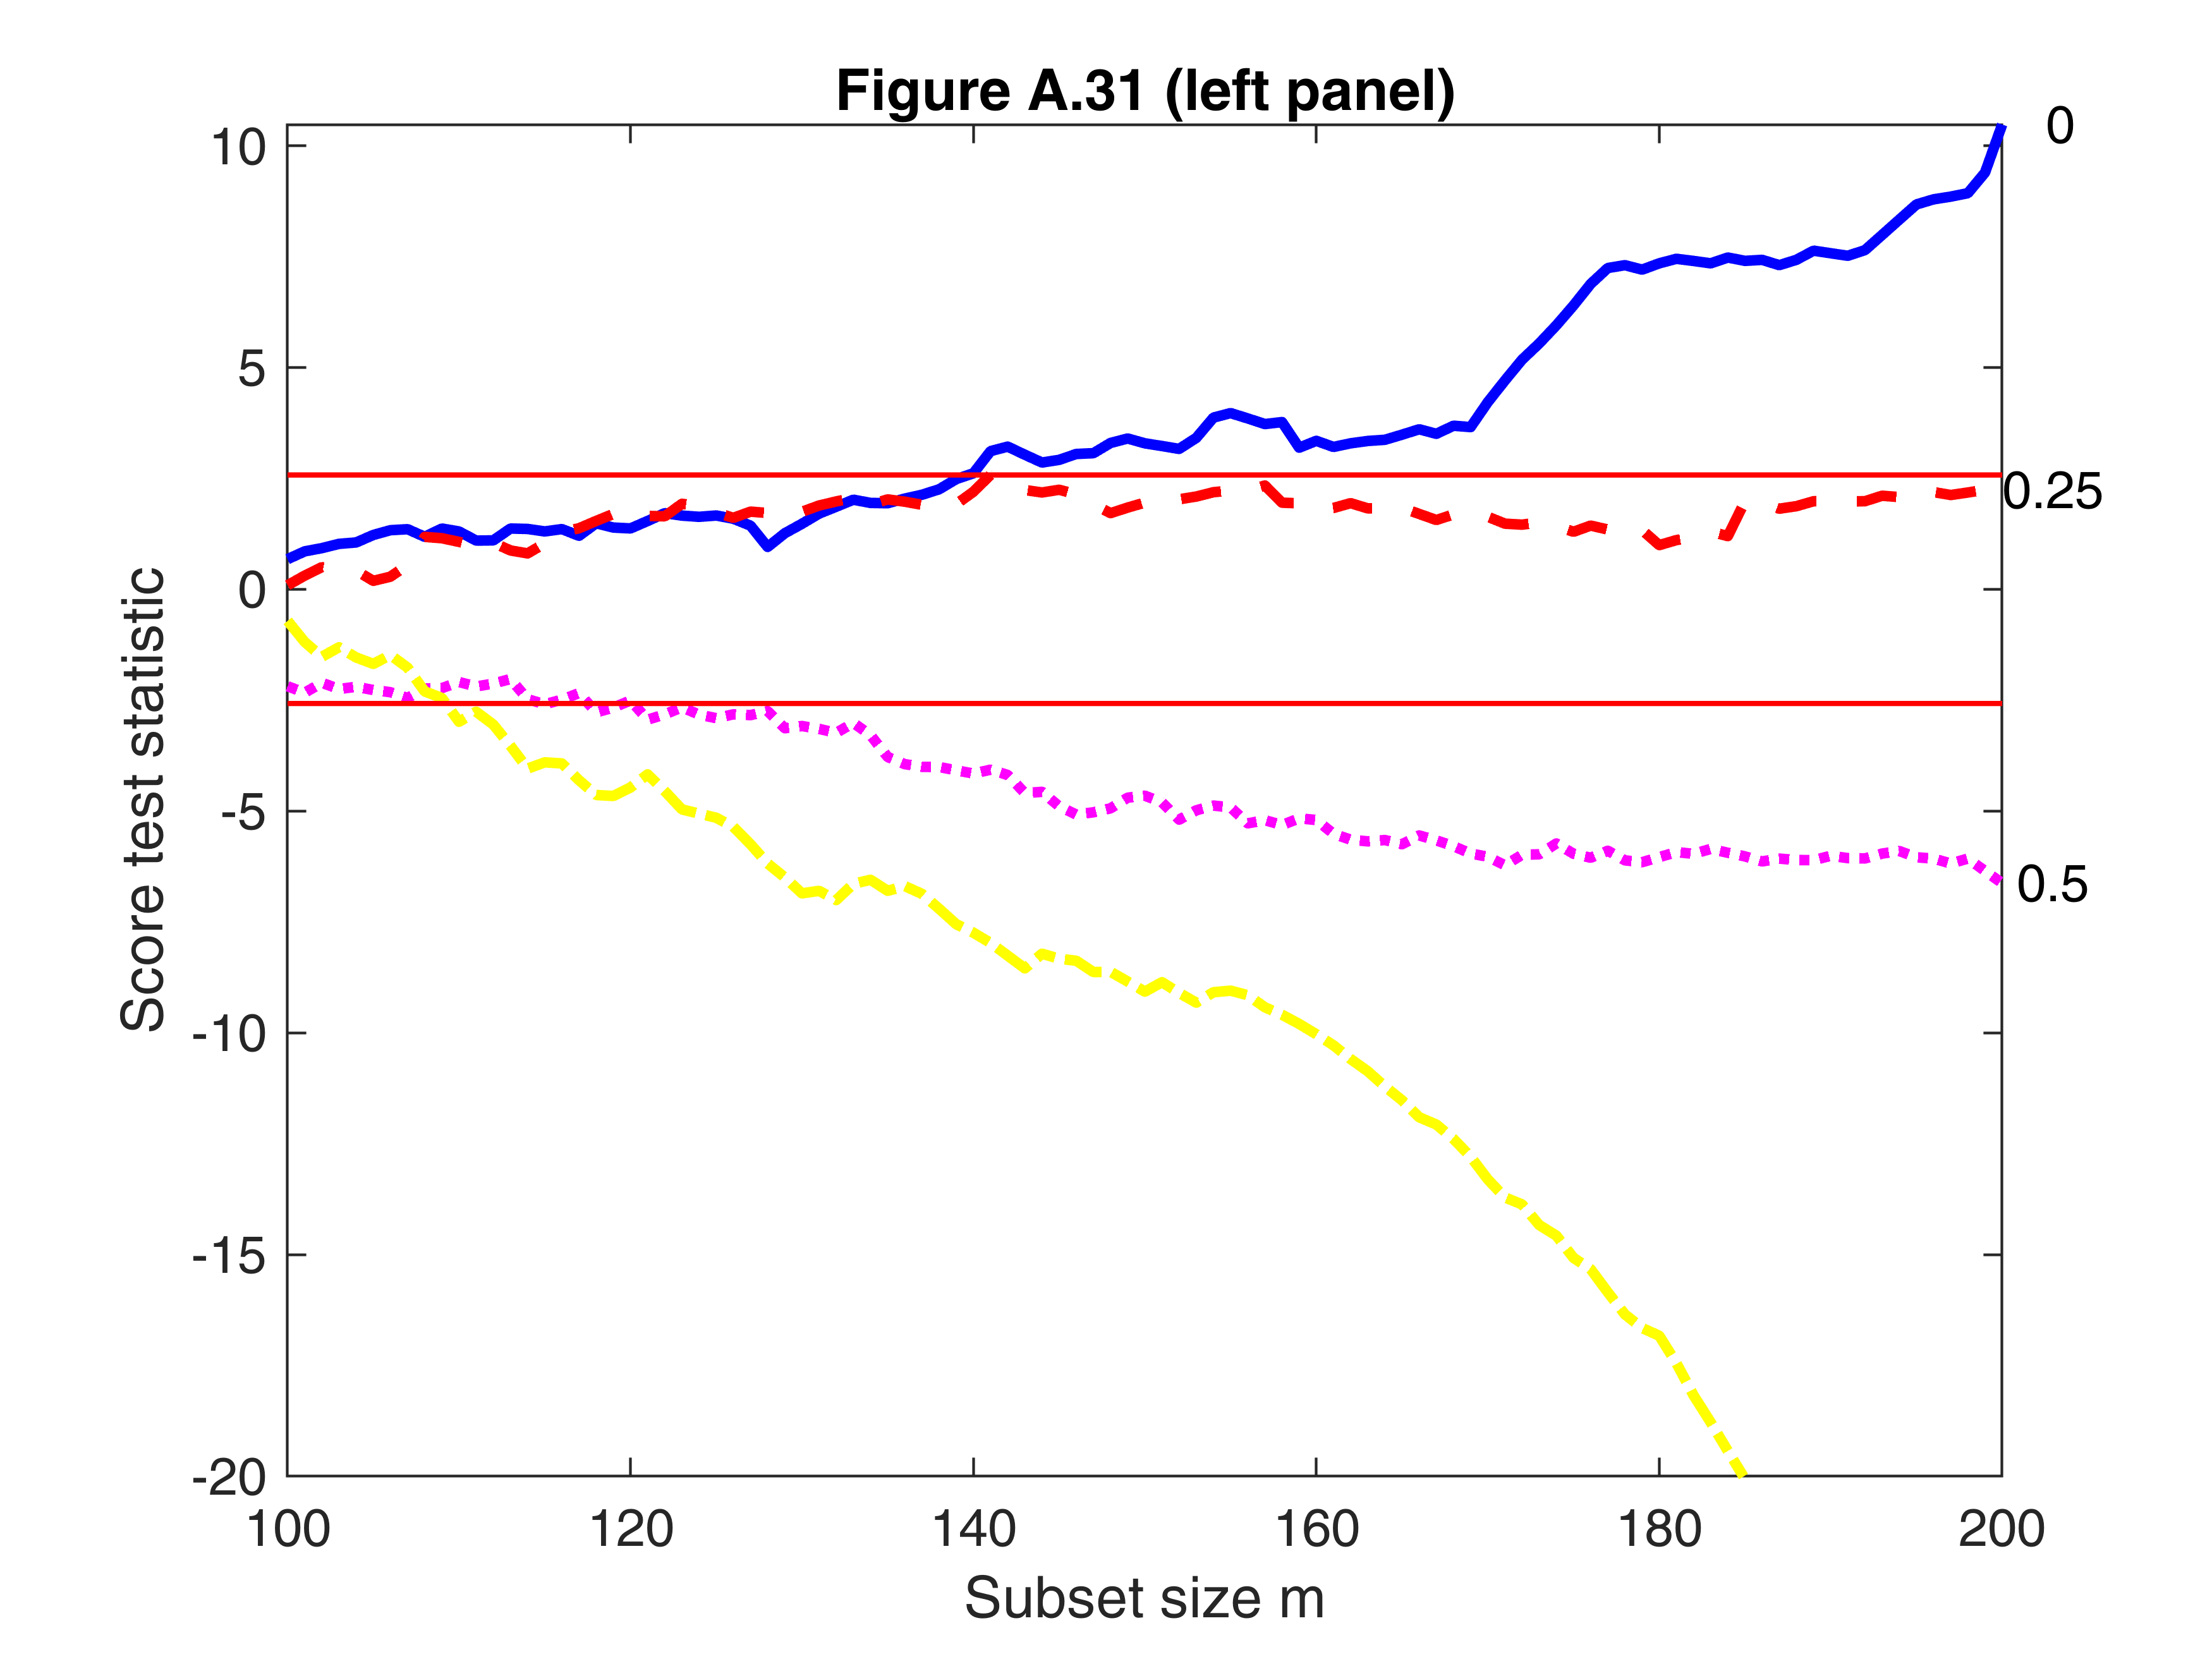

In [7]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(n/2),'ylimy',[-ylimy ylimy],'msg',0);

if prin==1
    print -depsc figs\D3fan.eps
else
    title('Figure A.31 (left panel)')
    set(gcf,"Name",'Figure A.31 (left panel)')
end

## Create Figure A.31 (right panel)

D3 fanplotpn



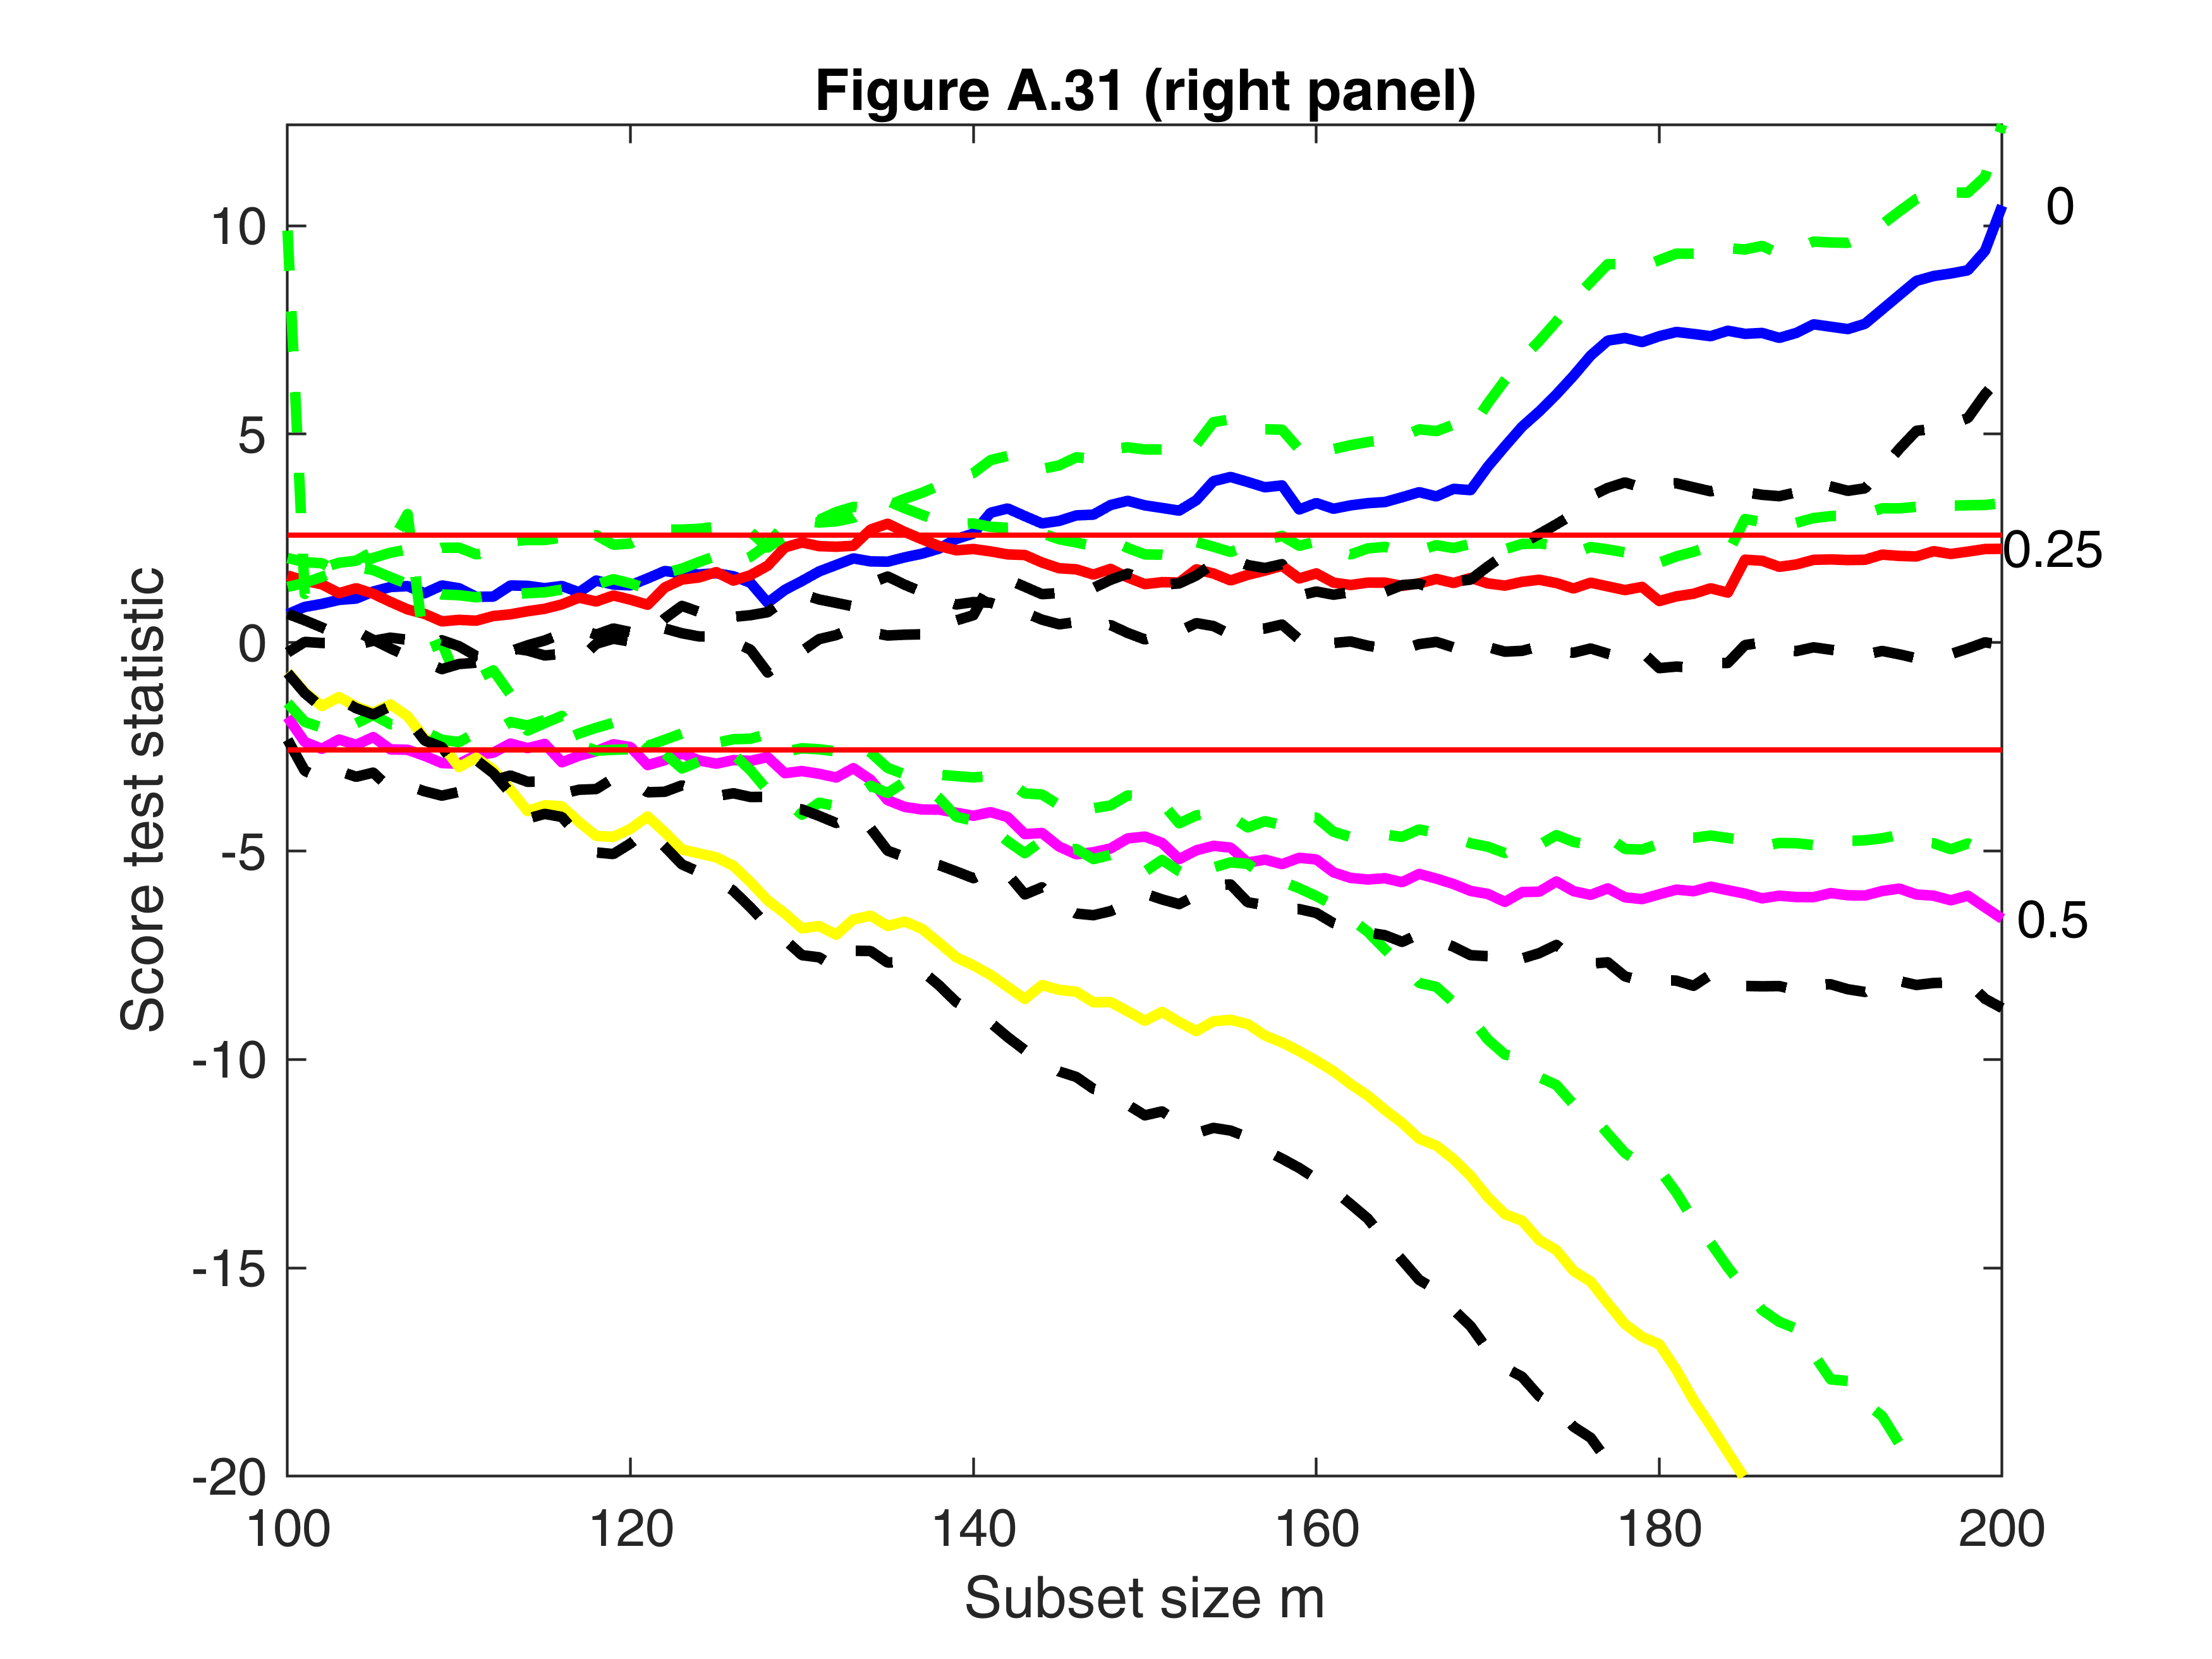

In [8]:
la=[0 0.25 0.5 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJpn','plots',1,'init',round(n/2), ...
    'ylimy',[-ylimy ylimy],'msg',0,'tag','pl_scopn');

if prin==1
    print -depsc \D3fanpn.eps
else
    title('Figure A.31 (right panel)')
    set(gcf,"Name",'Figure A.31 (right panel)')
end

## Create Figure A.32 and A.33

automatic procedure



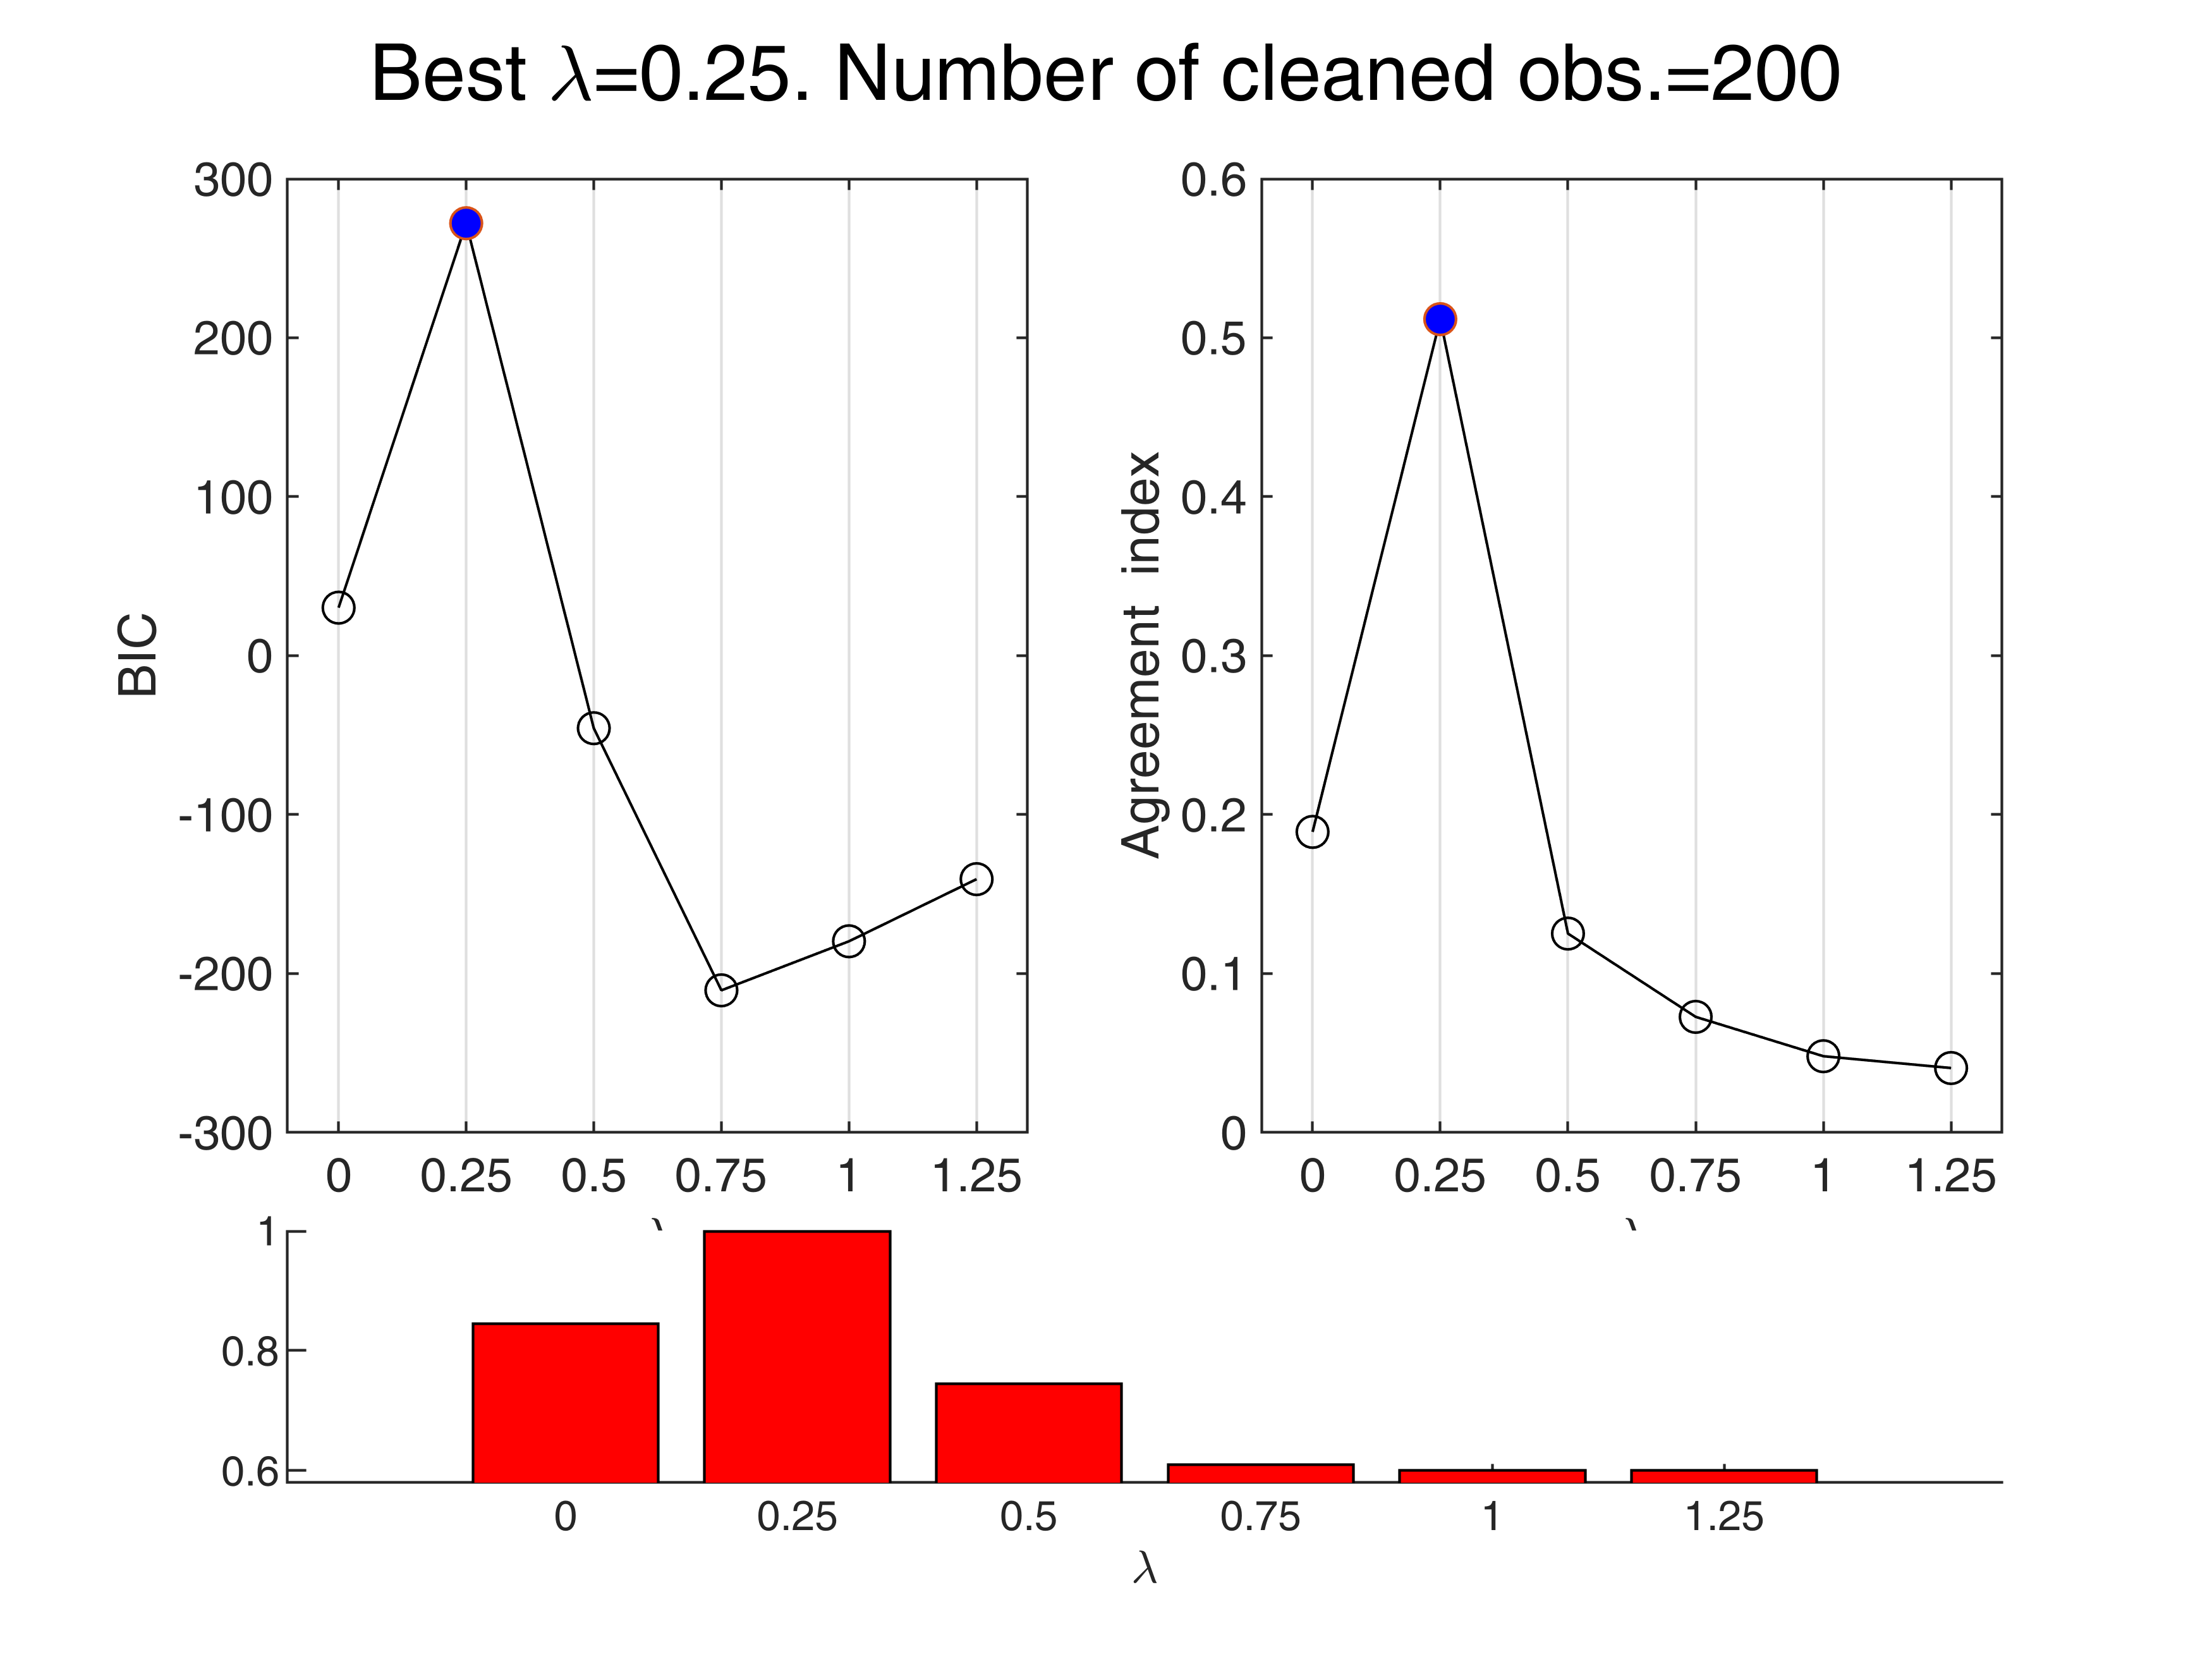

In [9]:
n=length(y);
[outFSRfan]=FSRfan(y,X,'plots',0,'init',round(n*0.3),'nsamp',10000,'la',[0 0.25 0.5 0.75 1 1.25],'msg',0,'family','YJ');
[outini]=fanBIC(outFSRfan,'plots',1);

In [10]:
if prin==1
    % print to postscript
    print -depsc figs\D3auto.eps;
end
% labest is the best value imposing the constraint that positive and
% negative observations must have the same transformation parameter.
disp('Automatic value of lambda (just on lambda)')

Automatic value of lambda (just on lambda)

In [11]:
labest=outini.labest;
disp(labest);

    0.2500

In [12]:

[outFSRfanpn]=FSRfan(y,X,'msg',0,'family','YJpn','la',labest,'plots',0);
out1=fanBICpn(outFSRfanpn);

Analyzing la_P=0.25 and la_N=-0.25
Analyzing la_P=0.25 and la_N=-0.5
Analyzing la_P=0.25 and la_N=0.25
Analyzing la_P=0.25 and la_N=0
Analyzing la_P=0.5 and la_N=-0.25
Analyzing la_P=0.5 and la_N=-0.5
Analyzing la_P=0.5 and la_N=0.25
Analyzing la_P=0.5 and la_N=0
Analyzing la_P=0.75 and la_N=-0.25
Analyzing la_P=0.75 and la_N=-0.5
Analyzing la_P=0.75 and la_N=0.25
Analyzing la_P=0.75 and la_N=0
Analyzing la_P=1 and la_N=-0.25
Analyzing la_P=1 and la_N=-0.5
Analyzing la_P=1 and la_N=0.25
Analyzing la_P=1 and la_N=0


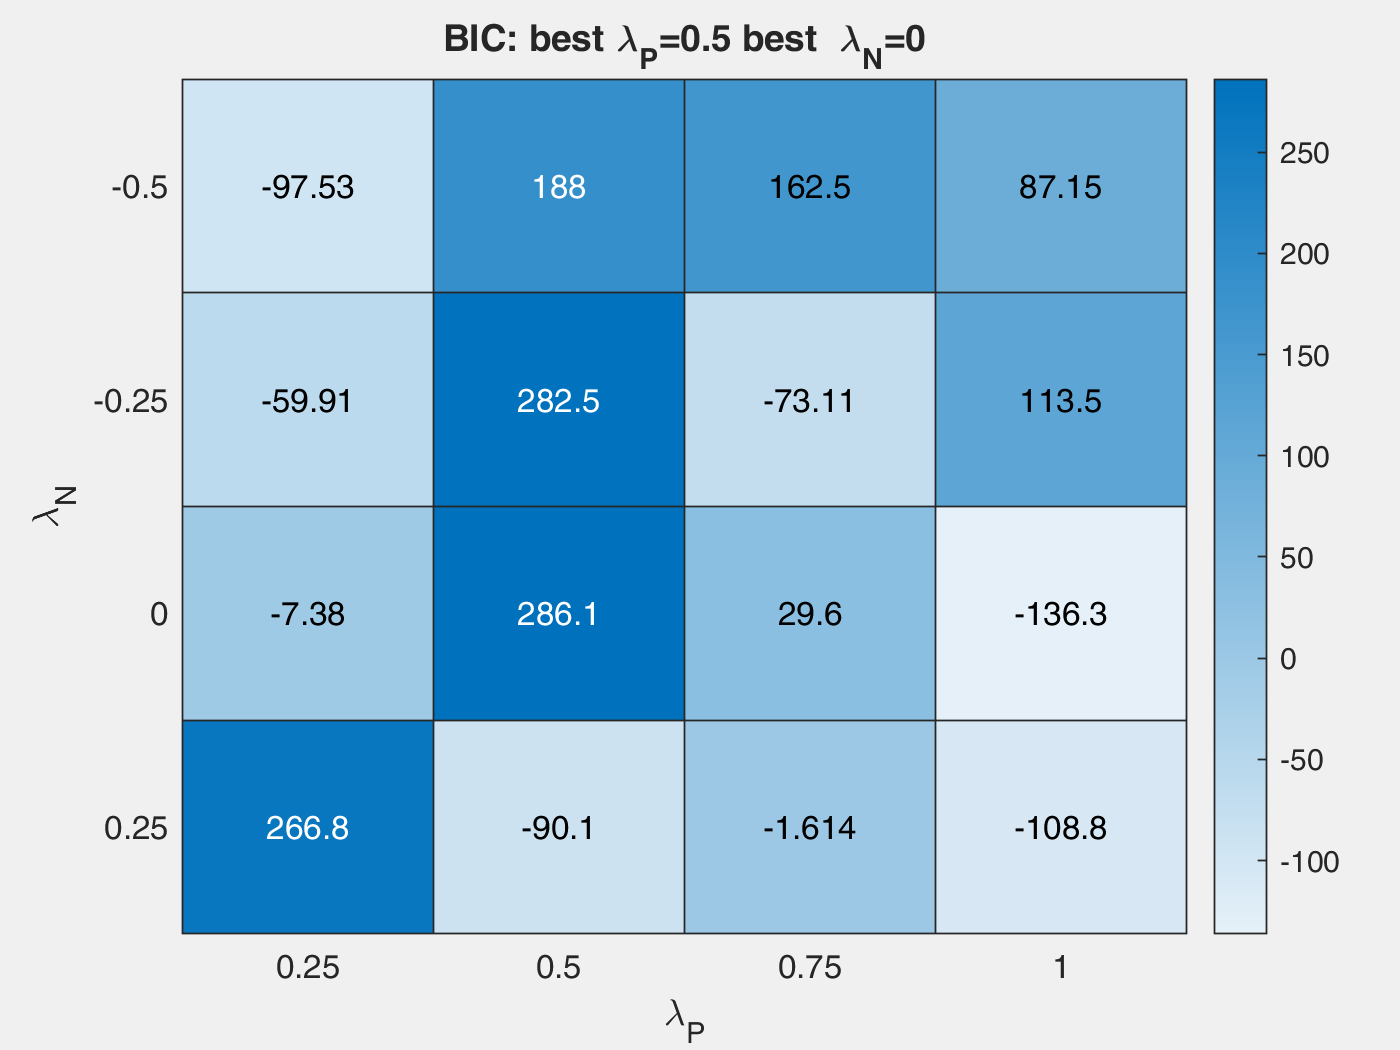

In [13]:

fig=findobj(0,'tag','pl_BIC');
figure(fig(1))
set(gcf,'Name', 'Figure A.32 (left panel)');


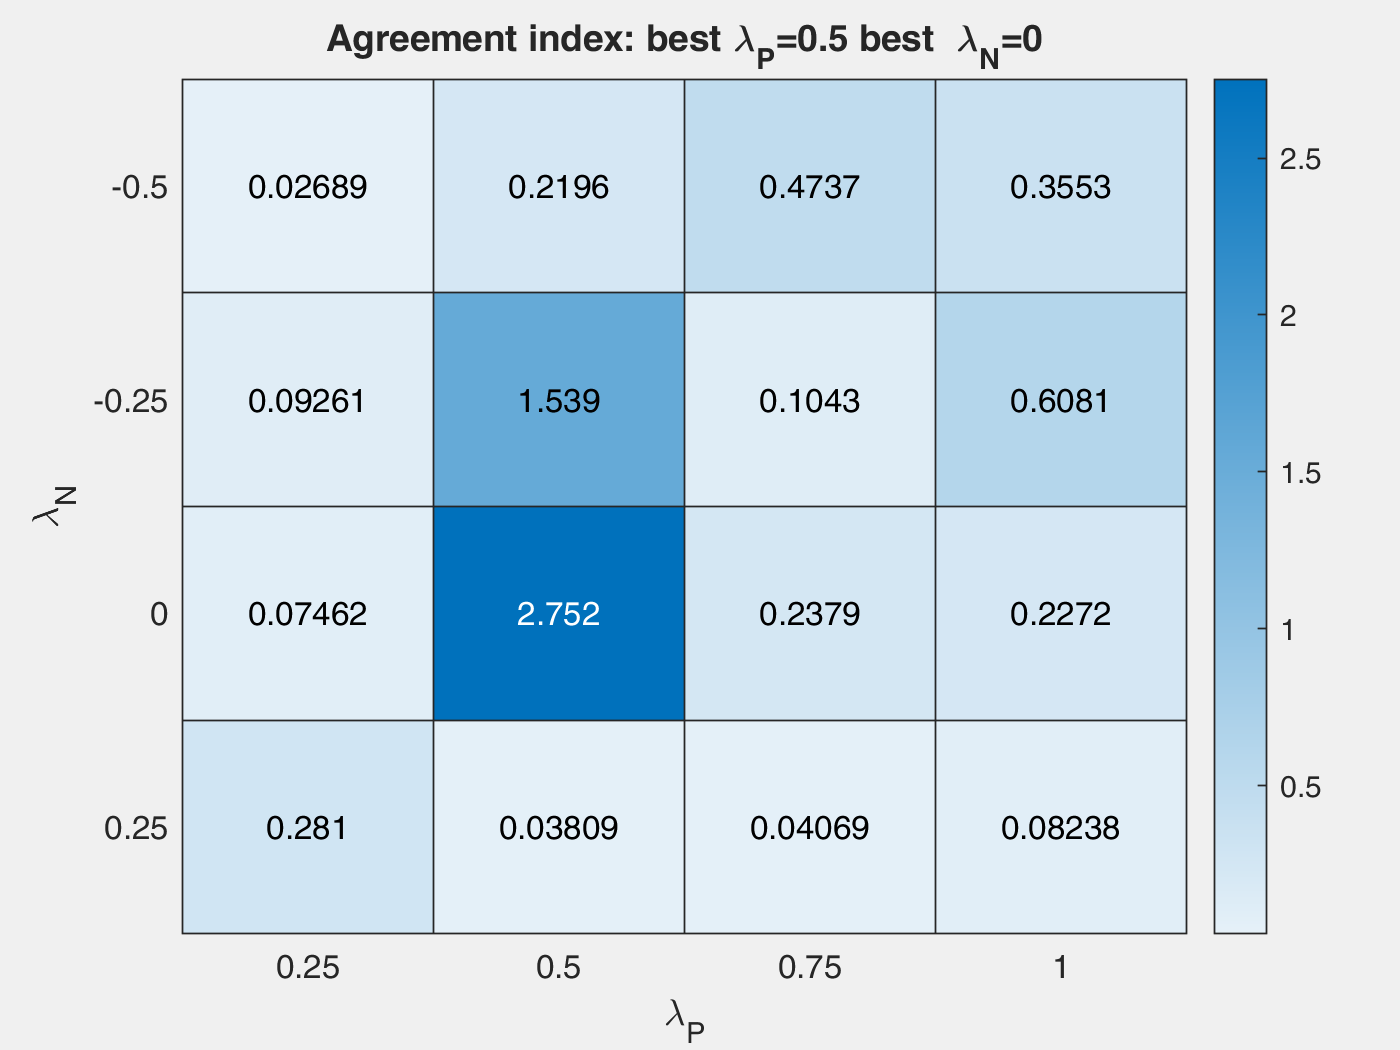

In [14]:

fig=findobj(0,'tag','pl_AGI');
figure(fig(1))
set(gcf,'Name', 'Figure A.32 (right panel)');


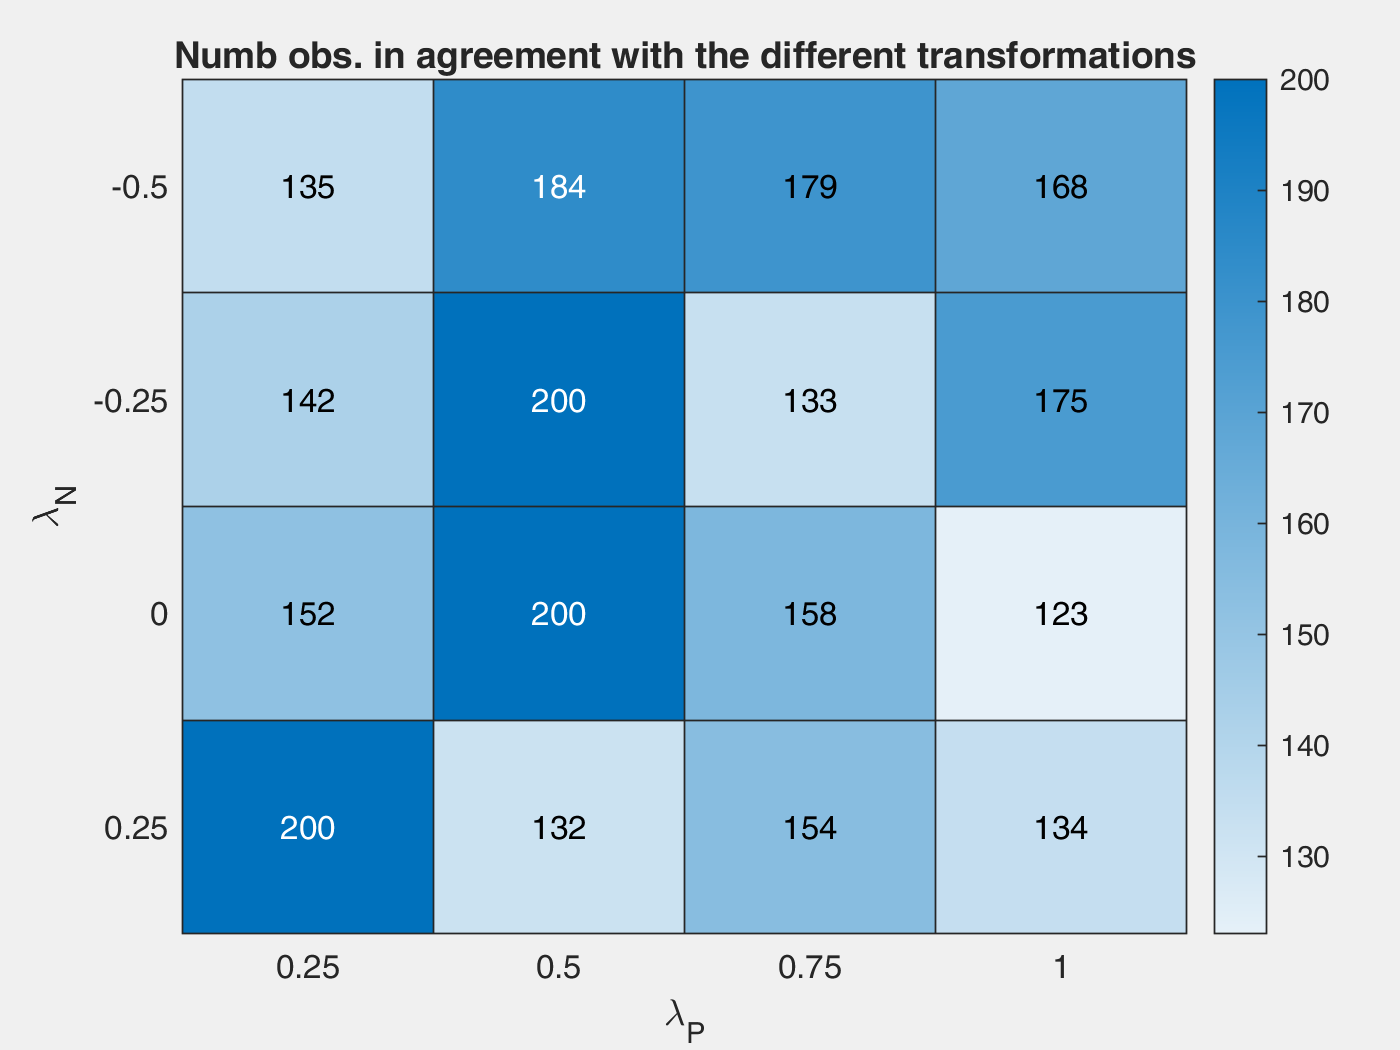

In [15]:

fig=findobj(0,'tag','pl_nobs');
figure(fig(1))
set(gcf,'Name', 'Figure A.33 (left panel)');


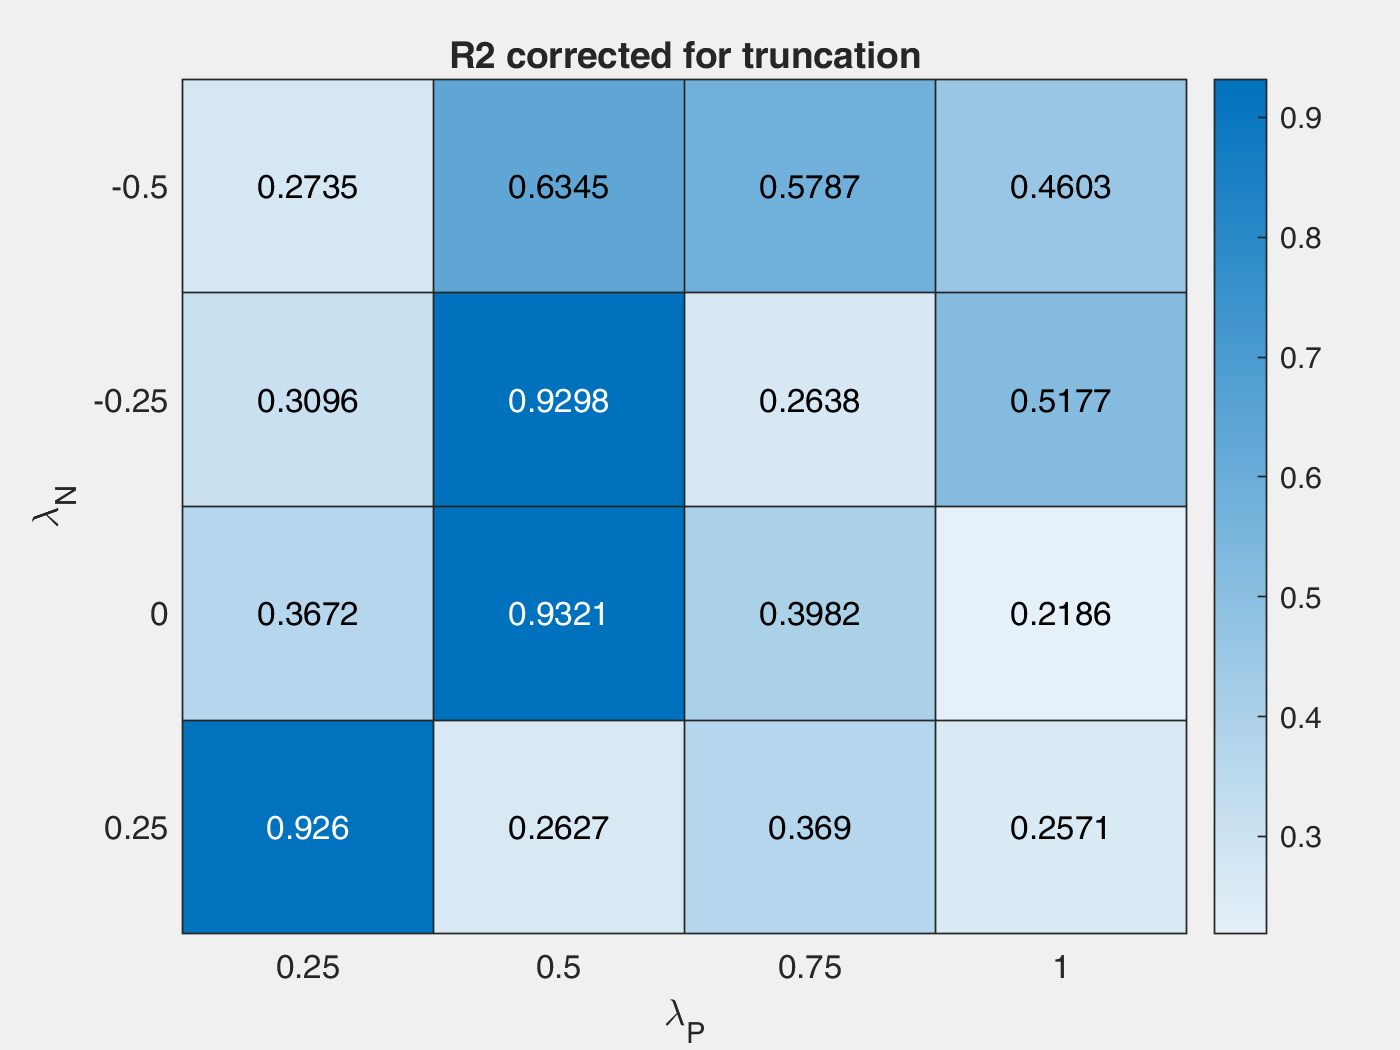

In [16]:

fig=findobj(0,'tag','pl_R2c');
figure(fig(1))
set(gcf,'Name', 'Figure A.33 (right panel)');

In [17]:

if prin==1
    % print to postscript
    print -depsc figs\D3autopnh.eps;
    print -depsc figs\D3autopnBIC.eps;
    print -depsc figs\D3autopnAGI.eps;
    print -depsc figs\D3autopnR2.eps;

end

## Prepare input for Figure A.34

yXplot after transforming y lapos=0.5; laneg=0;


In [18]:
lapos=out1.labestBIC(1);
laneg=out1.labestBIC(2);
ytra=y;
ytra(y>=0)=normYJ(y(y>=0),[],lapos,'Jacobian',false,'inverse',false);
ytra(y<0)=normYJ(y(y<0),[],laneg,'Jacobian',false,'inverse',false);
ylimy=8;

% FSR on ytra
outf=FSR(ytra,X,'init',n/2,'plots',0);

-------------------------
Signal detection loop
Sample seems homogeneous, no outlier has been found
Summary of the exceedances
           1          99         999        9999       99999
           0           0           0           0           0

In [19]:
if isnan(outf.outliers)
    outf.outliers=[];
end

## Create Figure A.34

yXplot after transforming y



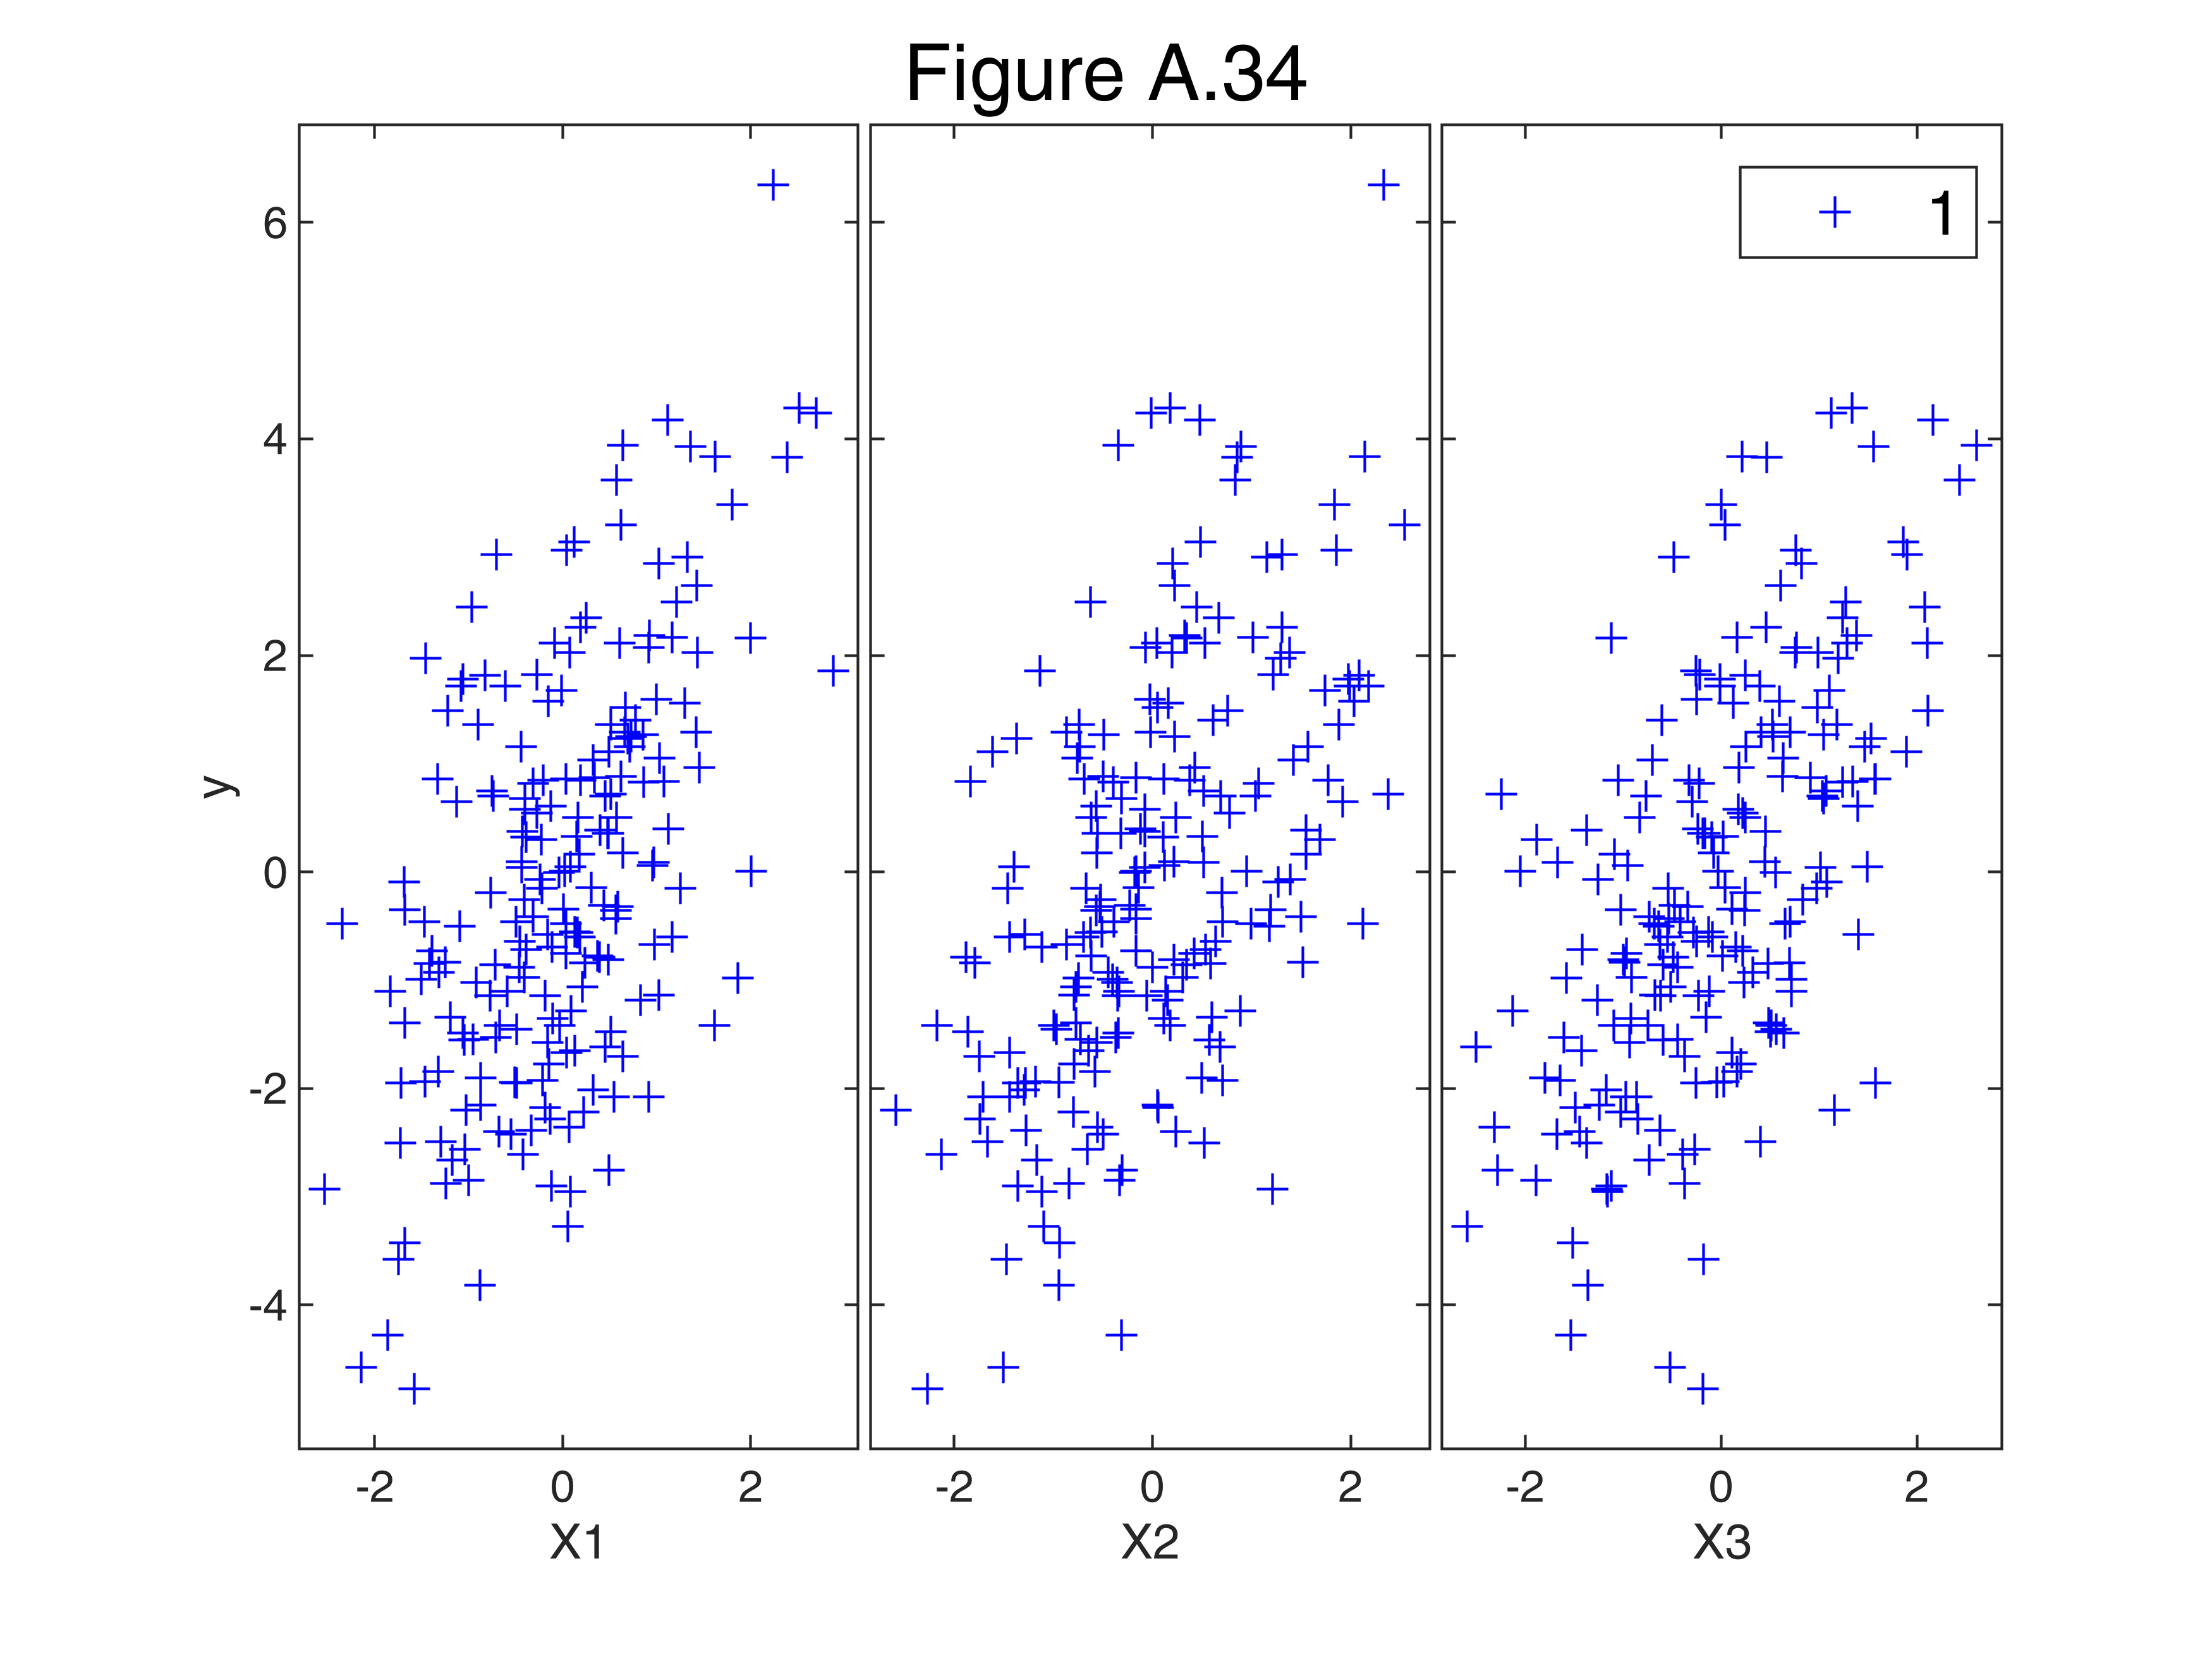

In [20]:
group=ones(n,1);
group(outf.outliers)=2;
yXplot(ytra,X,'group',group);

if prin==1
    legend off
    print -depsc D3ytraX.eps
else
    sgtitle('Figure A.34')
    set(gcf,"Name",'Figure A.34')
end

## Create Table A.16

D3 anova table after transforming y D2 anova table after transforming y


In [21]:
disp('Table A.16: ANOVA in the transformed scale for y')

Table A.16: ANOVA in the transformed scale for y

In [22]:
outTRA=fitlm(X,ytra);
disp(outTRA)

Linear regression model:
    y ~ 1 + x1 + x2 + x3
Estimated Coefficients:
                    Estimate        SE        tStat        pValue  
                   __________    ________    ________    __________
    (Intercept)    -0.0056834    0.035286    -0.16107       0.87221
    x1                 1.0114    0.035522      28.474    1.4341e-71
    x2                0.99893    0.033156      30.128    1.7303e-75
    x3                 1.0234    0.033576      30.479    2.6612e-76
Number of observations: 200, Error degrees of freedom: 196
Root Mean Squared Error: 0.499
R-squared: 0.932,  Adjusted R-Squared: 0.931
F-statistic vs. constant model: 897, p-value = 3.66e-114

In [23]:

%InsideREADME